<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/G2_Charli_0000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import requests
import pandas as pd

# ======================
# 1. Configuración
# ======================
API_KEY = "RGAPI-b794dc90-07ee-4fc6-a899-3ccb9f0d2dad"
riot_name = "G2 Charli"
riot_tag = "0000"

# ======================
# 2. PUUID del jugador
# ======================
url_account = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_name}/{riot_tag}?api_key={API_KEY}"
resp = requests.get(url_account).json()

puuid = resp["puuid"]
print("PUUID:", puuid)

# ======================
# 3. IDs de partidas recientes
# ======================
url_matches = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=30&api_key={API_KEY}"
matches = requests.get(url_matches).json()

print("Número de partidas obtenidas:", len(matches))

# ======================
# 4. Estadísticas de cada partida
# ======================
data = []

for match_id in matches:
    url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
    match_data = requests.get(url_match).json()

    # Buscar al jugador en la partida
    for player in match_data["info"]["participants"]:
        if player["puuid"] == puuid:
            stats = {
                "Partida": match_id,
                "Campeón": player["championName"],
                "Kills": player["kills"],
                "Deaths": player["deaths"],
                "Assists": player["assists"],
                "KDA": round((player["kills"] + player["assists"]) / (player["deaths"] if player["deaths"] > 0 else 1), 2),
                "CS": player["totalMinionsKilled"] + player.get("neutralMinionsKilled", 0),
                "Vision Score": player["visionScore"],
                "Daño infligido": player["totalDamageDealtToChampions"],
                "Daño recibido": player["totalDamageTaken"],
                "Resultado": "Victoria" if player["win"] else "Derrota"
            }
            data.append(stats)

# ======================
# 5. Convertir a DataFrame y mostrar
# ======================
df = pd.DataFrame(data)
print(df)

# ======================
# 6. Resumen general
# ======================
avg_kda = round(df["KDA"].mean(), 2)
avg_cs = round(df["CS"].mean(), 2)
avg_vision = round(df["Vision Score"].mean(), 2)
most_played = df["Campeón"].value_counts().index[0]

print("\n=== RESUMEN GENERAL ===")
print("Promedio de KDA:", avg_kda)
print("Promedio de CS:", avg_cs)
print("Promedio de visión:", avg_vision)
print("Campeón más jugado:", most_played)

# ======================
# 7. Generar informe automático
# ======================
print("\n=== INFORME DE MEJORA ===")

# KDA
if avg_kda < 2:
    print("- Tu KDA es bajo, mueres demasiado. Debes trabajar en posicionamiento y saber cuándo retirarte.")
elif avg_kda < 4:
    print("- Tu KDA es decente, pero aún puedes mejorar. Trata de morir menos y aprovechar mejor las peleas.")
else:
    print("- Muy buen KDA, manejas bien las peleas y el riesgo.")

# CS
if avg_cs < 100:
    print("- Farmeas poco. Practica last hit en partidas normales, apúntale a 7-8 cs/min en línea.")
elif avg_cs < 150:
    print("- Tu farm es aceptable, pero aún puedes mejorar el control de oleadas.")
else:
    print("- Muy buen farm, aprovechas bien los recursos.")

# Visión
if avg_vision < 20:
    print("- Colocas poca visión. Usa más wards y controla zonas clave del mapa.")
elif avg_vision < 40:
    print("- Tu visión es aceptable, pero aún puedes mejorar el control de mapa.")
else:
    print("- Muy buen uso de visión, ayudas al equipo a jugar seguro.")

# Campeón más jugado
print(f"- Tu campeón más jugado es **{most_played}**. Especialízate en dominarlo aún más o arma un pool de 2-3 campeones similares.")


PUUID: 5T5dkYdiy51LLVwblPSkCWkXCfYInrDb5jZGZ9JQV9aqcgxJudoA3RI8Ze1twAGqp6Og3motsFpNVA
Número de partidas obtenidas: 30
           Partida   Campeón  Kills  Deaths  Assists    KDA   CS  \
0   LA1_1651790760       Jax      1       7        4   0.71  118   
1   LA1_1651783595    Veigar      1       9        2   0.33   75   
2   LA1_1651697475  Nocturne     12       0        3  15.00  263   
3   LA1_1651678115     Senna      9      15       25   2.27   40   
4   LA1_1650643436    Veigar     16       4        4   5.00  262   
5   LA1_1650630756    Veigar      9       7        8   2.43  235   
6   LA1_1650395768    Veigar      0       7        1   0.14  246   
7   LA1_1650285851        Vi     10       8        6   2.00  243   
8   LA1_1650278368   Evelynn     13       4       14   6.75  239   
9   LA1_1650147800    Veigar      8       9        6   1.56  241   
10  LA1_1650135906    Veigar      5       2        2   3.50  198   
11  LA1_1650126712    Veigar      7       6        3   1.67  198 

In [29]:
from collections import defaultdict

champion_stats = defaultdict(lambda: {"wins": 0, "games": 0})

for match_id in matches:  # matches = lista de partidas que ya tienes
    url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
    match_data = requests.get(url_match).json()

    for player in match_data["info"]["participants"]:
        if player["puuid"] == puuid:
            champ = player["championName"]
            win = player["win"]

            champion_stats[champ]["games"] += 1
            if win:
                champion_stats[champ]["wins"] += 1


In [30]:
# Ordenar por cantidad de victorias
most_wins = sorted(champion_stats.items(), key=lambda x: x[1]["wins"], reverse=True)

print("=== Campeones con más victorias ===")
for champ, stats in most_wins[:18]:  # top 18 campeones
    winrate = (stats["wins"] / stats["games"]) * 100 if stats["games"] > 0 else 0
    print(f"{champ}: {stats['wins']} victorias en {stats['games']} partidas (Winrate: {winrate:.1f}%)")


=== Campeones con más victorias ===
Veigar: 5 victorias en 11 partidas (Winrate: 45.5%)
Jax: 1 victorias en 1 partidas (Winrate: 100.0%)
Nocturne: 1 victorias en 1 partidas (Winrate: 100.0%)
Senna: 1 victorias en 1 partidas (Winrate: 100.0%)
Vi: 1 victorias en 1 partidas (Winrate: 100.0%)
Evelynn: 1 victorias en 1 partidas (Winrate: 100.0%)
Soraka: 1 victorias en 1 partidas (Winrate: 100.0%)
Kayle: 1 victorias en 1 partidas (Winrate: 100.0%)
Maokai: 1 victorias en 1 partidas (Winrate: 100.0%)
Kennen: 1 victorias en 1 partidas (Winrate: 100.0%)
Ziggs: 1 victorias en 1 partidas (Winrate: 100.0%)
Kaisa: 1 victorias en 1 partidas (Winrate: 100.0%)
Fiora: 1 victorias en 2 partidas (Winrate: 50.0%)
Nautilus: 1 victorias en 2 partidas (Winrate: 50.0%)
Fizz: 0 victorias en 1 partidas (Winrate: 0.0%)
Thresh: 0 victorias en 1 partidas (Winrate: 0.0%)
Warwick: 0 victorias en 1 partidas (Winrate: 0.0%)
Xerath: 0 victorias en 1 partidas (Winrate: 0.0%)


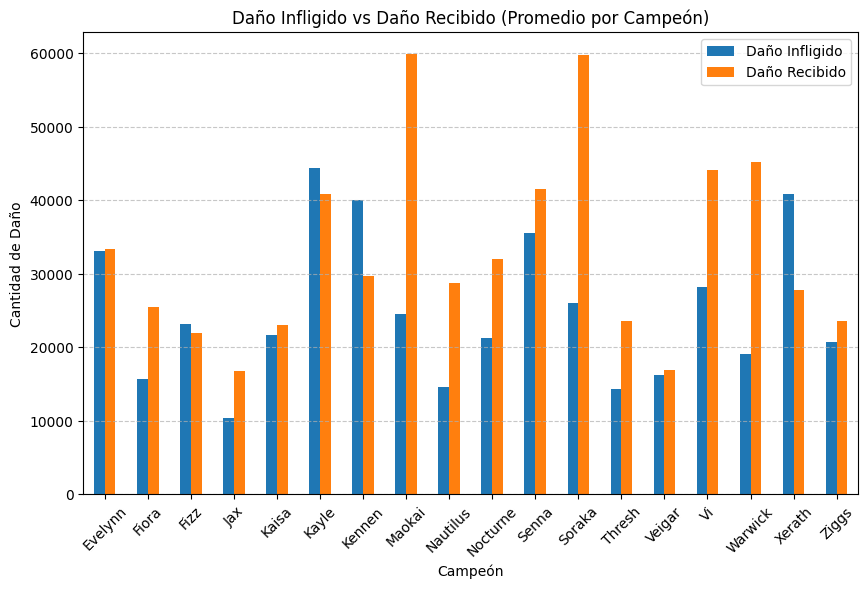

In [22]:
import matplotlib.pyplot as plt

# ==========================
# Promedio de daño infligido y recibido por campeón
# ==========================
resumen_dano = df.groupby("Campeón")[["Daño infligido", "Daño recibido"]].mean()

# ==========================
# Gráfico de barras
# ==========================
resumen_dano.plot(kind="bar", figsize=(10,6))

plt.title("Daño Infligido vs Daño Recibido (Promedio por Campeón)")
plt.ylabel("Cantidad de Daño")
plt.xlabel("Campeón")
plt.xticks(rotation=45)
plt.legend(["Daño Infligido", "Daño Recibido"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


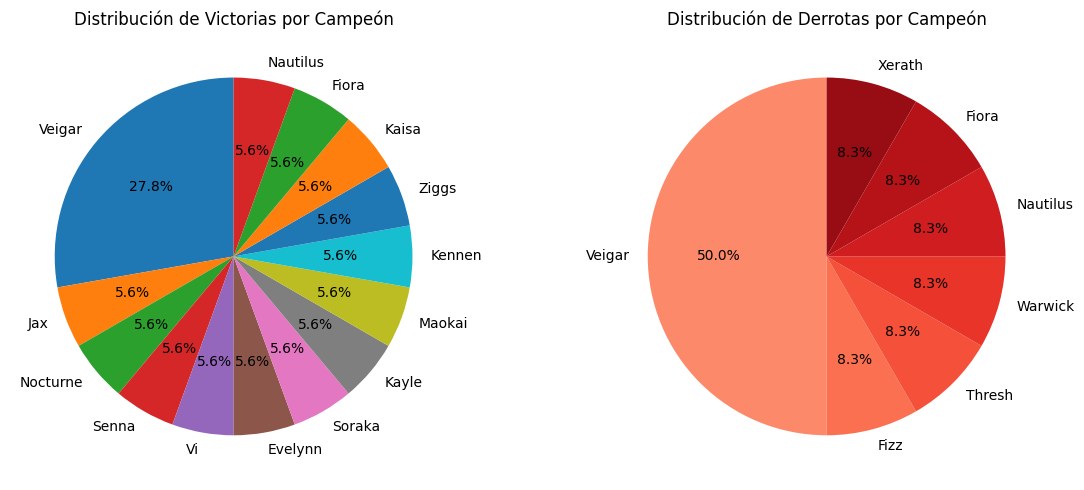

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# Contar victorias y derrotas por campeón
# ==========================
victorias = df[df["Resultado"] == "Victoria"]["Campeón"].value_counts()
derrotas = df[df["Resultado"] == "Derrota"]["Campeón"].value_counts()

# ==========================
# Generar colores desde la colormap Reds
# ==========================
colores_derrotas = plt.cm.Reds(np.linspace(0.4, 0.9, len(derrotas)))

# ==========================
# Gráfico de torta - Victorias
# ==========================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(victorias, labels=victorias.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Victorias por Campeón")

# ==========================
# Gráfico de torta - Derrotas
# ==========================
plt.subplot(1,2,2)
plt.pie(derrotas, labels=derrotas.index, autopct="%1.1f%%", startangle=90, colors=colores_derrotas)
plt.title("Distribución de Derrotas por Campeón")

plt.tight_layout()
plt.show()
